<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/PSO/notebooks/PSO_hw07_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework exercise 7 - Custom k-means clustering

Implement your own version of k-means clustering algorithm.

The clustering algorithm works by iteratively moving k centers in two steps:

1. Every data point is assigned to the center closest to it.
2. The centers are moved to a position defined as the center of all of the data points assigned to it in the previous step.

These two steps repeat until the centers do not change between iterations. The algorithm is initialized with the k centers determined randomly. It is also possible that in step 1 there will be a center which will not be assigned any data points. In that case the new center position will be determined randomly (same as during initialization).

*Notes:*

* We will initialize the random centers using the uniform distribution (e.g. `np.random.rand()`) spanning from the lowest to the highest value for each feature. You can also try a different initialization strategy such as selecting a random data point.

* We will also set a `max_iter` threshold as a keyword argument which will stop the algorithm after cetrain number of iterations. This is especially important during debugging as you may accidentaly create an endless loop.

* You will need to calculate distances from all points to all centers. You can implement this on your own either using for loops or broadcasting. However the best solution is to use `scipy.spatial.distance_matrix` which generates a matrix containing the distances between all points and centers. It is possible to do this in a more effective way, but that is out of the scope of this lab.

* There are multiple parts of the code where you could use a for cycle. Using numpy style code is better, but feel free to start with the for cycles and once your code works you can work on removing them.

The signature of the function will be `my_k_means(k, X, max_iter=100)` with `k` being the number of clusters, X being the data points in the shape `(num_points, num_features)`. The function will return two outputs. The first output will be an array of indices assigning each data point to a cluster via an index (e.g. `[1, 0, 2, 1, 1, 0 ...]`) and the second output will return an array of shape `(k, num_features)` cotaining the centers of clusters on each row.


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial import distance_matrix

def my_k_means(k, X, max_iter=100):
  ...

The following code should test your algorithm on randomly generated data.

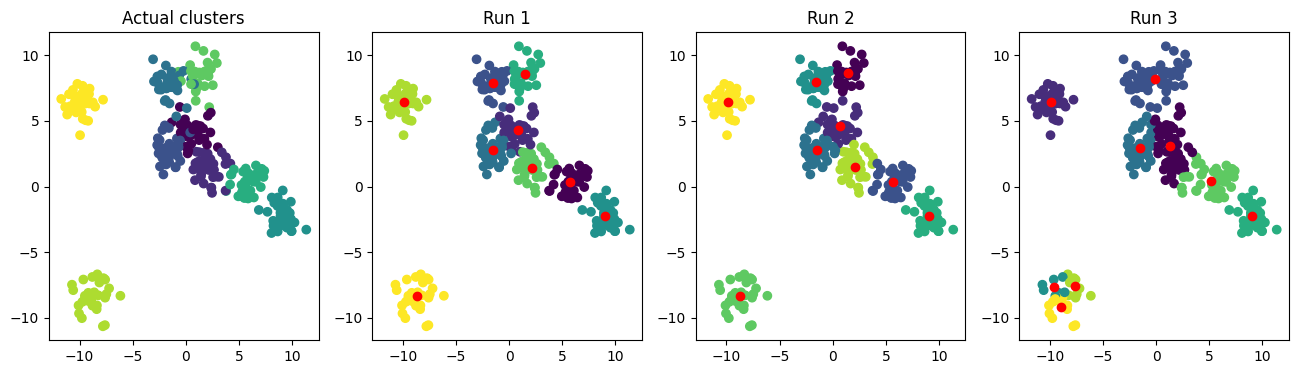

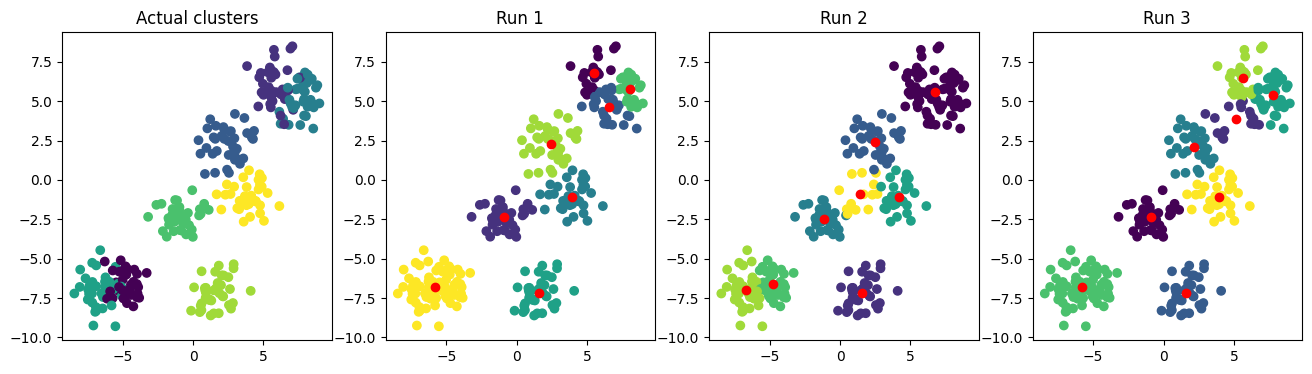

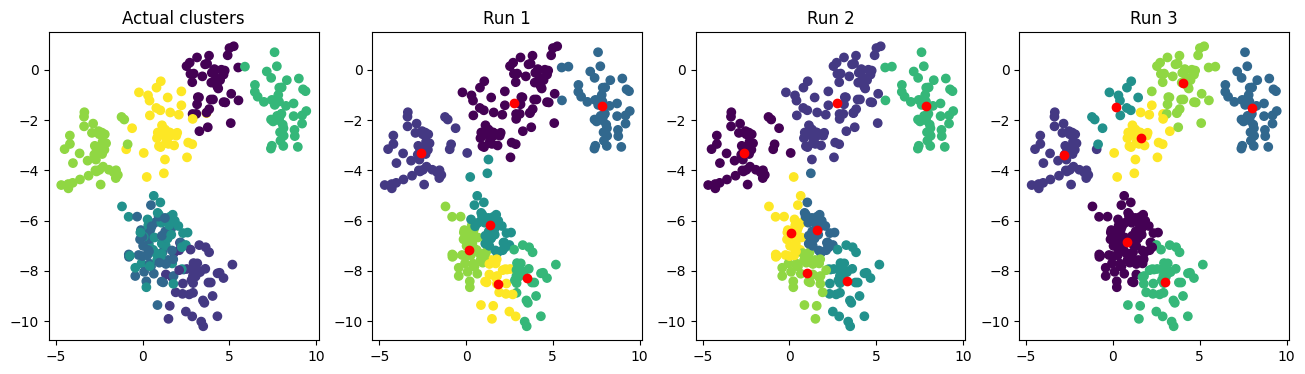

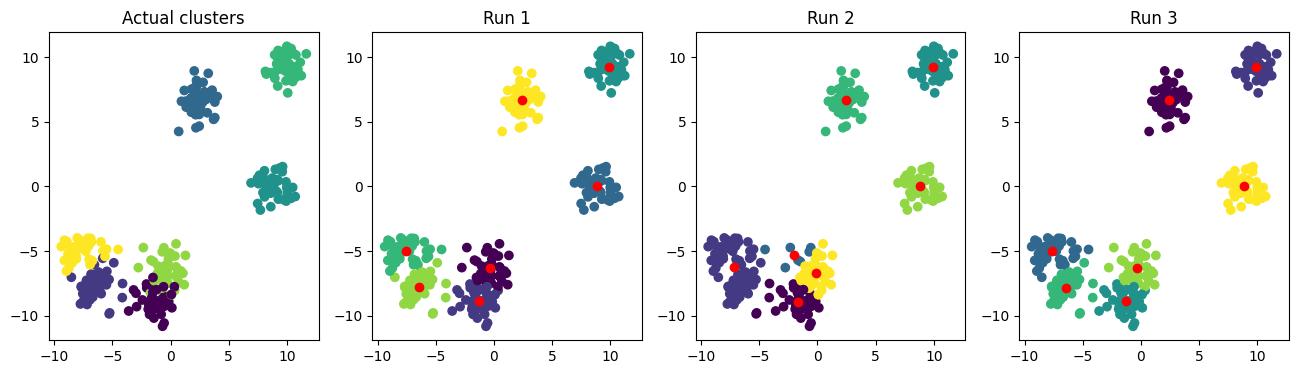

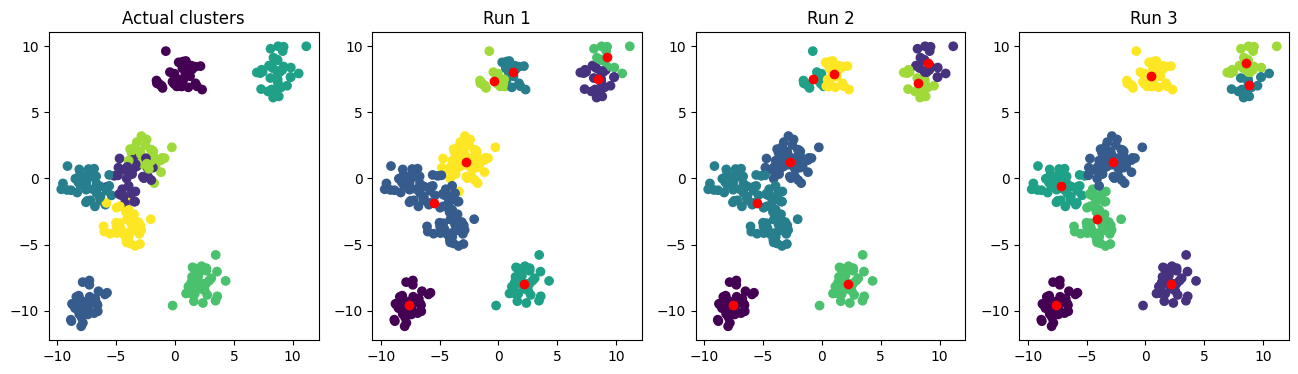

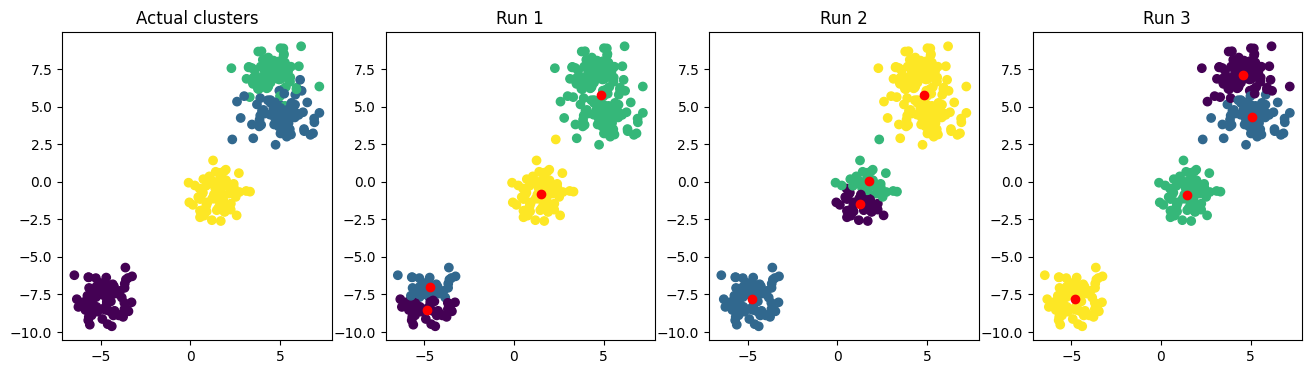

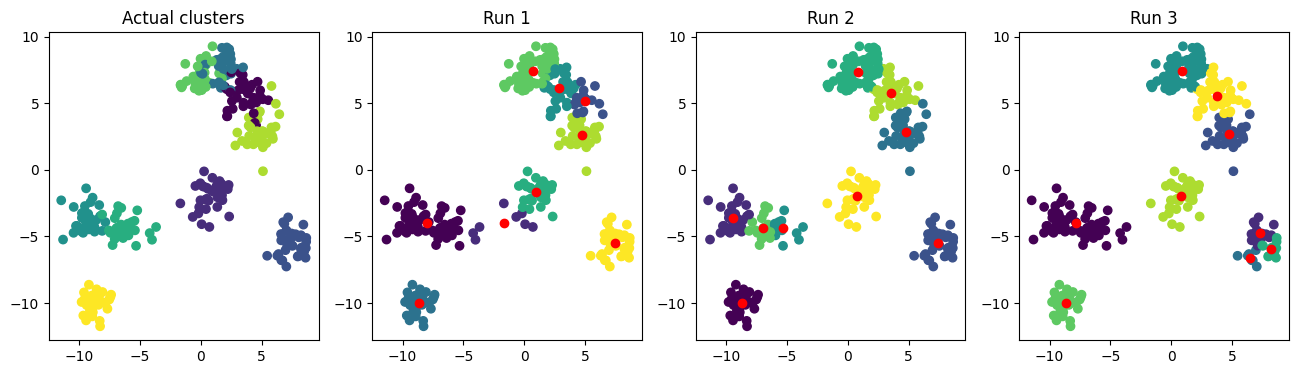

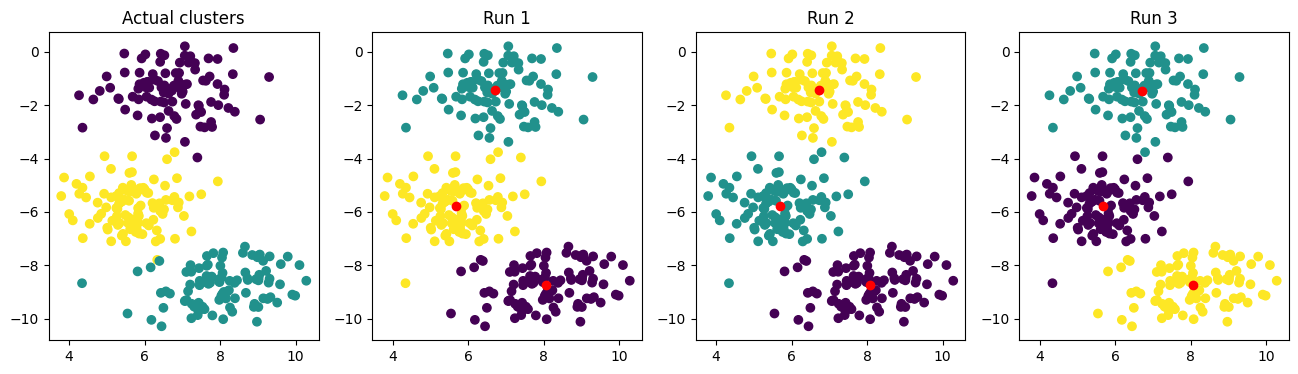

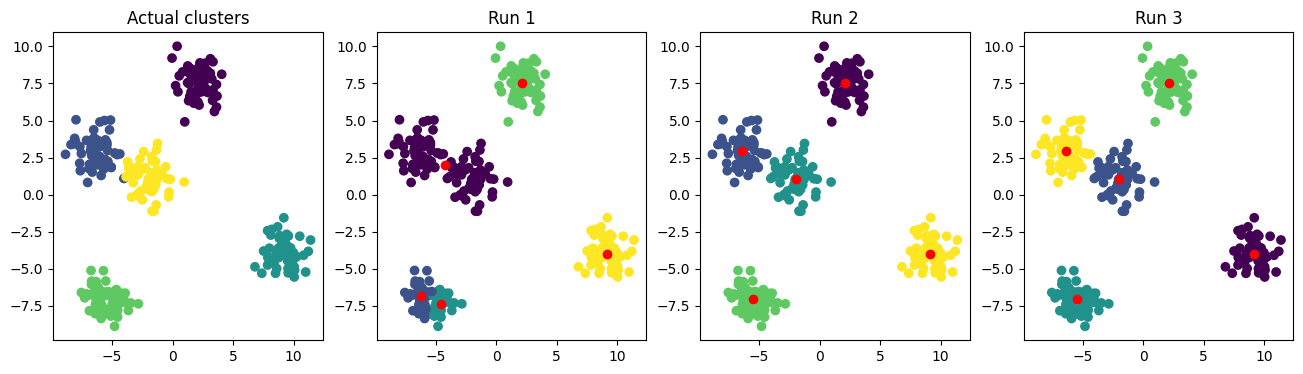

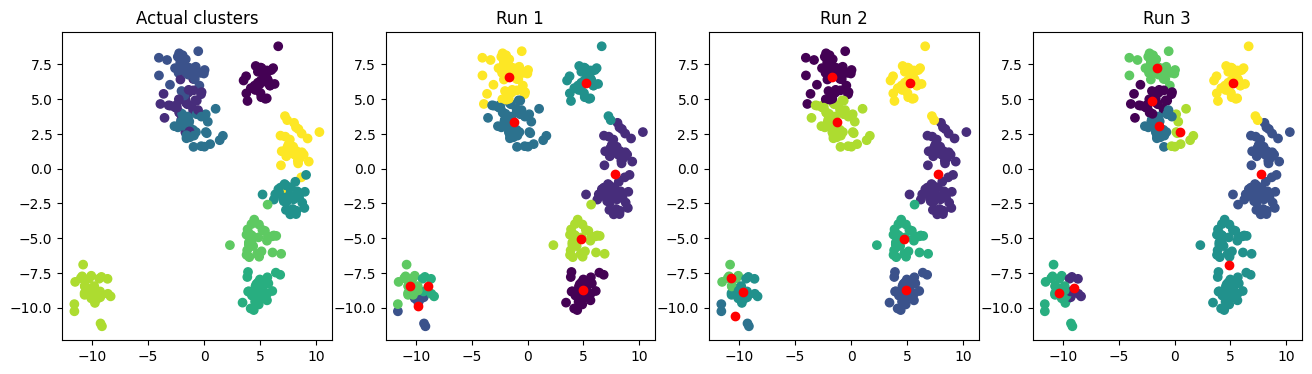

In [ ]:
from sklearn.datasets import make_blobs

for r in range(10):
  plt.figure(figsize=(16,4))

  k = np.random.randint(2, 10)

  X, y = make_blobs(n_samples=300, centers=k, n_features=2, cluster_std=0.9, random_state=456*r)
  plt.subplot(1, 4, 1)
  plt.scatter(X[:, 0], X[:, 1], c=y)
  plt.title('Actual clusters')

  for i in range(3):
    assignments, m = my_k_means(k, X)
    plt.subplot(1, 4, i+2)
    plt.scatter(X[:, 0], X[:, 1], c=assignments)
    plt.scatter(m[:, 0], m[:, 1], c='r')
    plt.title('Run {}'.format(i + 1))
  plt.show()